In [1]:
from elasticsearch import Elasticsearch
import pandas as pd
import json
import glob
import seaborn as sns
import nltk
import plotly.express as px
import scipy
# Assuming you have already created an Elasticsearch client instance 'es'
es = Elasticsearch("http://localhost:9200")

# Metadata

In [2]:
all_transcripts = {
  "_source": ["duration", "num_sentences", "num_words", 'publisher'],
  "stored_fields": ["_id"],
  "size": 1027
}

# Execute the Elasticsearch search query
# show_search_results = es.search(index="spotify_podcast_transcripts", body=show_body)
results = es.search(index="spotify_podcast_transcripts", body=all_transcripts)

# Extract relevant information from the search results
hits = results["hits"]["hits"]

In [5]:
all_transcripts = {
  "_source": ["show_uri", "transcript"],
  "stored_fields": ["_id"],
  "size": 1027
}

# Execute the Elasticsearch search query
# show_search_results = es.search(index="spotify_podcast_transcripts", body=show_body)
results = es.search(index="spotify_podcast_transcripts", body=all_transcripts)

# Extract relevant information from the search results
hits = results["hits"]["hits"]


In [38]:
by_episode_duration_sentlen = [(hit["_id"],
                                hit["_source"]['duration'],
                                hit["_source"]['num_sentences'],
                                hit["_source"]['num_words'],
                                hit["_source"]['publisher']) for hit in hits]

In [39]:
results = pd.DataFrame.from_records(by_episode_duration_sentlen).rename(columns={0:"episode_uri",
                                                                                 1:'Episode Length (min)',
                                                                                 2:'Number of Sentences',
                                                                                 3:'Number of Words',
                                                                                 4:'Publisher'})
results.iloc[:, 1:-1] = results.iloc[:, 1:-1].astype('int')


C:\Users\Olivia\AppData\Local\Temp\ipykernel_5688\1374980054.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  results.iloc[:, 1:-1] = results.iloc[:, 1:-1].astype('int')


In [40]:
results.describe().round(2)

,Episode Length (min),Number of Sentences,Number of Words
count,1027.00,1027.00,1027.00
mean,35.49,349.88,6749.59
std,22.99,257.82,4790.90
min,1.00,4.00,60.00
25%,16.00,128.50,2569.50
50%,34.00,300.00,5988.00
75%,53.00,533.50,10318.00
max,90.00,1215.00,22408.00


In [41]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027 entries, 0 to 1026
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   episode_uri           1027 non-null   object
 1   Episode Length (min)  1027 non-null   int32 
 2   Number of Sentences   1027 non-null   int32 
 3   Number of Words       1027 non-null   int32 
 4   Publisher             1027 non-null   object
dtypes: int32(3), object(2)
memory usage: 28.2+ KB


In [42]:
results[results['Number of Sentences'] <= 200]

,episode_uri,Episode Length (min),Number of Sentences,Number of Words,Publisher
14,spotify:episode:5xH3cdpkxnJhQjPV22sxKC,20,118,3005,Parcast Network
19,spotify:episode:4qUfA4SJE37KDe4UQ7theq,19,137,3262,Lore Party Podcast Network
20,spotify:episode:2bI4lMf13AufxzbyaH83vI,17,182,3469,Skincare Sommeliers
25,spotify:episode:6LhzGRUTkJ3jOp8uB2nXmh,3,38,542,Francisco Lara
31,spotify:episode:2bA3SdEDHSWpbpX4BL5TUf,16,199,2945,Dan Perkins
...,...,...,...,...,...
1016,spotify:episode:2GeHhC1g8F5ybrriBvLPEi,8,55,925,Connie
1018,spotify:episode:5nGrqVsmYEN88GChpccxrF,3,21,379,Elevate Digital
1019,spotify:episode:31u2KJ7szLvm5HPP6GgyYg,16,159,3320,Emma Cooper | The Network Marketing Mum
1024,spotify:episode:6e6LyN7z8yusnDrqnE6Hm5,18,160,3367,Noelle Ames


In [33]:
results[results['Episode Length (min)'] <= results['Episode Length (min)'].median()]

,episode_uri,Episode Length (min),Number of Sentences,Number of Words
9,spotify:episode:0X663c1I6j1cehJvy10WMm,34,229,6152
11,spotify:episode:6jTICOEaZJrExbnvuFZh8e,25,334,4664
14,spotify:episode:5xH3cdpkxnJhQjPV22sxKC,20,118,3005
19,spotify:episode:4qUfA4SJE37KDe4UQ7theq,19,137,3262
20,spotify:episode:2bI4lMf13AufxzbyaH83vI,17,182,3469
...,...,...,...,...
1018,spotify:episode:5nGrqVsmYEN88GChpccxrF,3,21,379
1019,spotify:episode:31u2KJ7szLvm5HPP6GgyYg,16,159,3320
1024,spotify:episode:6e6LyN7z8yusnDrqnE6Hm5,18,160,3367
1025,spotify:episode:7qPPLigaXeKDzE9lUyNY91,4,40,456


In [49]:
results['Publisher'].value_counts().head(20)

Parcast Network                  57
Spotify Studios                  25
Gimlet                           22
AfterBuzz TV                     18
Bitokbitok University             6
Coach Corey Wayne                 5
Optimal Living Daily              4
Gary Vaynerchuk                   4
Simon Whistler                    4
Everyday Positivity               4
Abraham Hicks                     4
Yardaena Osband & Anne Gordon     4
QuickRead.com                     3
OCBC                              3
Dr. Neal Malik                    3
UPCI Youth Ministries             3
Sasha Tamaddon                    3
ASMR                              3
Trent Vineyard                    3
CNX CondÃ© Nast                   3
Name: Publisher, dtype: int64

In [48]:
results[results['Publisher']=='Gimlet']

,episode_uri,Episode Length (min),Number of Sentences,Number of Words,Publisher
71,spotify:episode:0S1ejzvKzr6BJZVUkIGXpr,29,309,5589,Gimlet
88,spotify:episode:1SdguXlFBsxMcYtdPyh0oH,40,552,6491,Gimlet
259,spotify:episode:0NJmaKcBPTiD5jIU40nFl4,3,19,460,Gimlet
260,spotify:episode:1TicQO3vAuYoPoS3XZeL6y,3,27,481,Gimlet
261,spotify:episode:25Vg76v8xDHeVq20caFUOr,3,16,404,Gimlet
262,spotify:episode:3gqwRApB8dGhCbZAaRG4C1,3,16,369,Gimlet
263,spotify:episode:3kq7f86T2C6hrsYGU1YGhv,3,23,428,Gimlet
264,spotify:episode:3SxE188dmuDZeTLiZ1NbFB,3,18,390,Gimlet
265,spotify:episode:3VC6zWWapVYCXanUeVtnnV,3,23,443,Gimlet
266,spotify:episode:3xNSneHkYqNyGDVgz5NKAl,3,20,474,Gimlet


In [24]:
results.to_csv('output/results_duration_episode_length.csv')

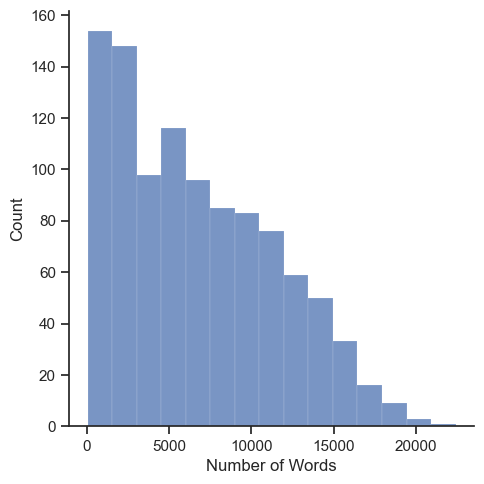

In [30]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.displot(results, x='Number of Words', linewidth=0.1)

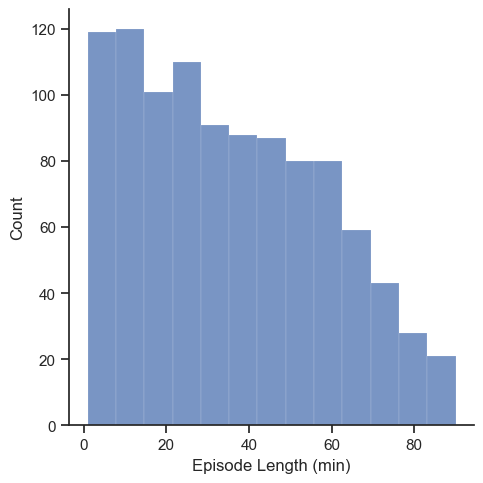

In [25]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.displot(results, x='Episode Length (min)', linewidth=0.1)

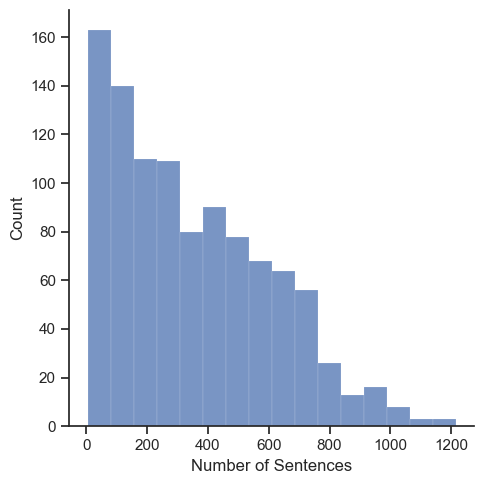

In [26]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.displot(results, x='Number of Sentences', linewidth=0.1)

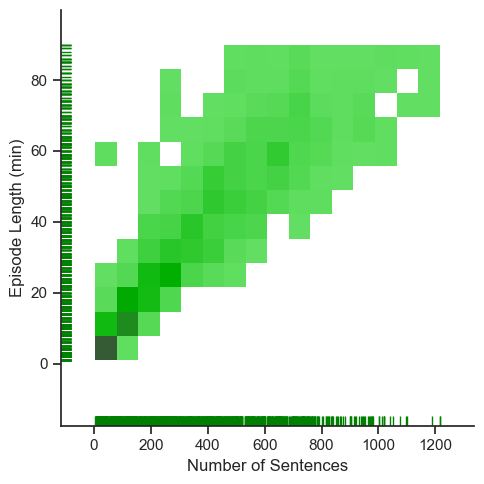

In [28]:

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.displot(data=results, x="Number of Sentences", y="Episode Length (min)",  rug=True, color = 'green')

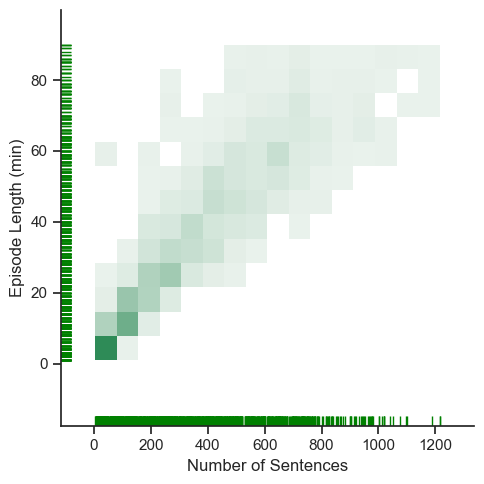

In [83]:
custom_cmap = sns.light_palette("seagreen", as_cmap=True)
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.displot(data=results, x="Number of Sentences", y="Episode Length (min)",  rug=True, color = 'green', cmap=custom_cmap)

# Transcripts

In [8]:
transcripts = [(hit["_id"], hit["_source"]['show_uri'], hit["_source"]['transcript']) for hit in hits]

In [10]:
eval_transcripts = pd.DataFrame.from_records(transcripts).rename(columns={0:"episode_uri",
                                                                          1:'show_uri',
                                                                          2:'Transcript'})
eval_transcripts


,episode_uri,show_uri,Transcript
0,spotify:episode:74t5WREXUbhEKNI89CNSkL,spotify:show:015DbLwcXu2fK7e9jIfbFo,Welcome back to another episode of tuxedo time...
1,spotify:episode:5fG4VlWnWwzAt6mSs0H7lY,spotify:show:01DbRiALDPdvZdoiY8yQL6,"What's up, guys? This episode of the podcast i..."
2,spotify:episode:2WQ1GcC6J0k7qsO8Vvf2be,spotify:show:01eumErJvBdxCW4YJivbwc,"What's up, everybody? Welcome to the in the do..."
3,spotify:episode:5hvOWPoB0j6HMrSVAMtJLV,spotify:show:01Txd706SjsgvM0cm0UXuM,You are listening to Irish illustrate Insider....
4,spotify:episode:7JG3lLnRoDdOxuqjf14ZkM,spotify:show:01Txd706SjsgvM0cm0UXuM,You have tuned into Irish Illustrated Insider....
...,...,...,...
1022,spotify:episode:1t6R1TrR8D7kkKnFcuOD8A,spotify:show:7wbEc7QxASrGQoFyb0dxoS,That's right. Now we are at War. How do you c...
1023,spotify:episode:1JnsLxgHqv9kv21D5bhIKy,spotify:show:7wd4F1RZw7aQKN4K7cVakB,Hey y'all. Welcome to the late night vision sh...
1024,spotify:episode:6e6LyN7z8yusnDrqnE6Hm5,spotify:show:7xjC57YxW8SqmQha1Tjgge,Hello my friends and welcome to episode number...
1025,spotify:episode:7qPPLigaXeKDzE9lUyNY91,spotify:show:7yeMJ1fd1BLgqft0WnARzb,"Fitness mantra Hello, those two guess haplogr..."


In [11]:
eval_transcripts.to_csv('output/eval_transcripts.csv', index=False)